### Блок импорта библиотек

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression #
from sklearn.svm import SVR
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split #модель разбиения данных на тест и обучение
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, scale #Модель нормализации данных
%pylab inline
%matplotlib notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 80)

Populating the interactive namespace from numpy and matplotlib


### Исследование данных

In [2]:
#Загрузка данных
data=pd.read_csv('./train.csv',  keep_default_na=True)

In [6]:
data.describe()   #есть ли еще функции, выводящие сводную статистику?

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)",Exports and imports (% of GGP),Share of seats in senate (% held by female),Natural resource depletion,"Mean years of education, female (galactic years)","Mean years of education, male (galactic years)","Expected years of education, female (galactic years)","Expected years of education, male (galactic years)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,2021.000000,2015.000000,1502.000000,1271.000000,1271.000000,1271.000000,1259.000000,1264.000000,12

In [ ]:
data.info()   #проверка типов признаков

In [3]:
#needed_col = list(data.columns)
#needed_col.remove('galaxy')
df = data.dropna(axis=1, thresh=0.3*data.count().max())
df = df.drop('galaxy', axis=1)
#df = df.loc[:,needed_col]
#df = df.drop(['galaxy', 'existence expectancy index', 'Life expectancy at birth, female (galactic years)',
#              'Mortality rate, under-five (per 1,000 live births)','Intergalactic Development Index (IDI)',
#             'Mortality rate, infant (per 1,000 live births)', 'Life expectancy at birth, male (galactic years)',
#             'Mortality rate, female grown up (per 1,000 people)', 'Mortality rate, male grown up (per 1,000 people)'], axis=1)
(abs(df.iloc[:,:].corr()))

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),y
galactic year,1.000000,0.187039,0.181568,0.095975,0.123550,0.282894,0.213887,0.185498,0.248211,0.171035,0.124062,0.092558,0.065555,0.023482,0.126547,0.285559,0.293032,0.097474,0.027642,0.006658,0.249722,0.227021,0.040355,0.244495,0.183216,0.051158,0.060794,0.023593,0.144065,0.016951,0.063866,0.183216,0.167155,0.034208,0.021864,0.095854,0.053208,0.060248,0.149795,0.184159,0.275838,0.132880,0.114685,0.041182,0.107635,0.161214,0.045131,0.019264
existence expectancy index,0.187039,1.000000,0.906977,0.501570,0.719948,0.727130,0.663205,0.822225,0.706852,0.734496,0.759686,0.760521,0.145760,0.011381,0.600558,0.836244,0.845807,0.560210,0.008712,0.028073,0.894244,0.902424,0.012581,0.741362,0.714857,0.115376,0.705929,0.026388,0.699263,0.278948,0.271701,0.665380,0.185753,0.230865,0.039126,0.000441,0.112101,0.113565,0.856375,0.811722,0.556043,0.530420,0.525812,0.060065,0.092206,0.769987,0.608865,0.547397
existence expectancy at birth,0.181568,0.906977,1.000000,0.511724,0.728802,0.727310,0.668287,0.829761,0.712190,0.738777,0.758805,0.767041,0.150063,0.017900,0.624044,0.831802,0.842194,0.572450,0.005467,0.023846,0.899311,0.899516,0.009121,0.754236,0.727279,0.110687,0.720834,0.015205,0.715764,0.268669,0.268415,0.676498,0.176009,0.226157,0.031572,0.007117,0.115026,0.108575,0.857371,0.812311,0.569998,0.533847,0.538788,0.057277,0.088850,0.775750,0.624401,0.555757
Gross income per capita,0.095975,0.501570,0.511724,1.000000,0.735733,0.488421,0.456370,0.608962,0.494624,0.629033,0.478688,0.529162,0.036773,0.038560,0.587634,0.462886,0.494490,0.371578,0.038336,0.046171,0.550566,0.511801,0.053501,0.544845,0.467246,0.279900,0.600808,0.103675,0.579830,0.014459,0.064430,0.588928,0.044565,0.023629,0.054539,0.028530,0.223057,0.023226,0.459702,0.498832,0.29566

In [ ]:
data['galaxy'].value_counts().count()

<IPython.core.display.Javascript object>


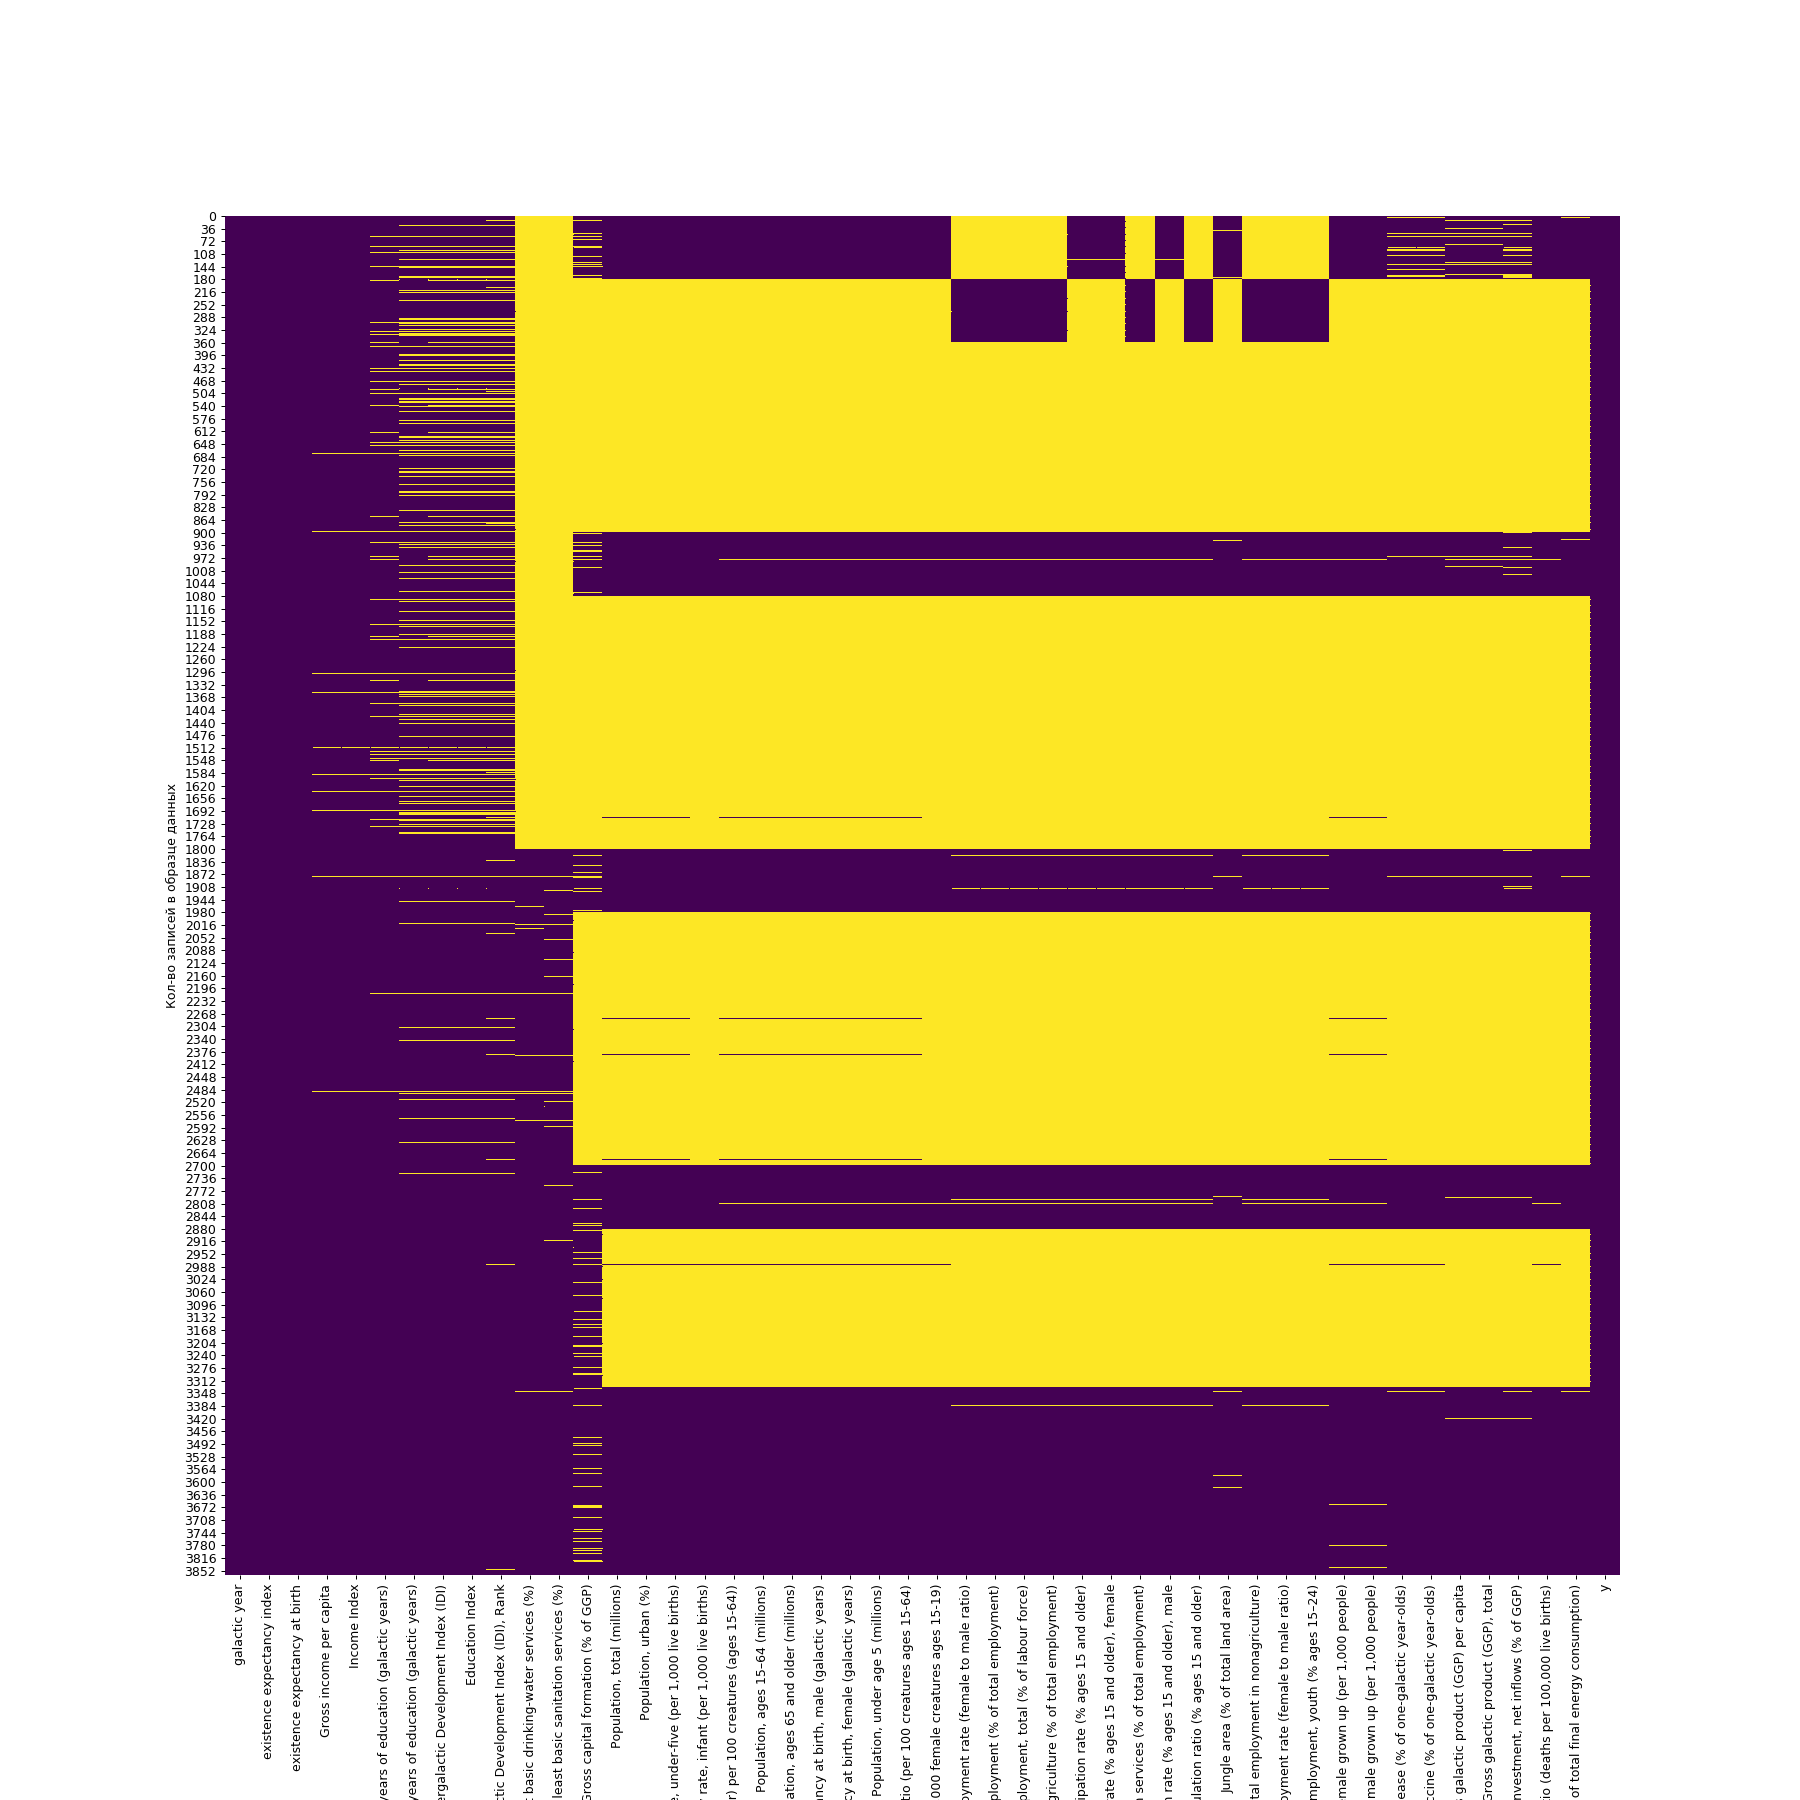

In [4]:
# Желтые ячейки - отсутствующие данные NaN - yellow cells
plt.figure(figsize=(20,20))
ax=sns.heatmap(df.isnull(), cmap='viridis', robust=True, cbar=False ) 
ax.set(xlabel='Признаки', ylabel='Кол-во записей в образце данных')
plt.show()

In [ ]:
plt.figure(figsize=(50,50))
bx = sns.heatmap(data.iloc[:,:].corr(), yticklabels=True, xticklabels=True, linewidths=.1, annot=True)
plt.show()
#plt.savefig('heatmap.png', dpi=200)

In [ ]:
(abs(df.iloc[:,:].corr()))

In [ ]:
plt.figure(figsize=(50,50))
bx = sns.heatmap(df.corr(), yticklabels=True, xticklabels=True, linewidths=.1, annot=True)
plt.show()

In [4]:
df.fillna(df.median(), inplace=True)  #замена пропусков на матожидание по столбцу
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 48 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   existence expectancy index                                                               3865 non-null   float64
 2   existence expectancy at birth                                                            3865 non-null   float64
 3   Gross income per capita                                                                  3865 non-null   float64
 4   Income Index                                                                             3865 non-null   float64
 5   Expected years of education (galactic years)                  

In [5]:
X = df.iloc[:,df.columns != 'y']
quant_X = X.quantile([.25, .75])
copy = quant_X.copy()
for i in range(len(copy.iloc[0])):
    copy.iloc[0,i] -= ((quant_X.iloc[1,i] - quant_X.iloc[0,i]) * 1.5)
    copy.iloc[1,i] += ((quant_X.iloc[1,i] - quant_X.iloc[0,i]) * 1.5)
X = X.apply(lambda x: x[(x>copy.loc[0.25,x.name]) & 
                                    (x < copy.loc[0.75,x.name])], axis=0)
X.fillna(X.median(), inplace=True)
X.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",Total unemployment rate (female to male ratio),Vulnerable employment (% of total employment),"Unemployment, total (% of labour force)",Employment in agriculture (% of total employment),Labour force participation rate (% ages 15 and older),"Labour force participation rate (% ages 15 and older), female",Employment in services (% of total employment),"Labour force participation rate (% ages 15 and older), male",Employment to population ratio (% ages 15 and older),Jungle area (% of total land area),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Youth unemployment rate (female to male ratio),"Unemployment, youth (% ages 15–24)","Mortality rate, female grown up (per 1,000 people)","Mortality rate, male grown up (per 1,000 people)","Infants lacking immunization, red hot disease (% of one-galactic year-olds)","Infants lacking immunization, Combination Vaccine (% of one-galactic year-olds)",Gross galactic product (GGP) per capita,"Gross galactic product (GGP), total","Outer Galaxies direct investment, net inflows (% of GGP)","Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption)
count,3.865000e+03,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000
mean,1.000709e+06,0.873968,76.929658,27786.682411,0.825169,14.780328,10.293492,0.806321,0.747453,135.217138,105.568735,104.882244,31.218032,765.123675,77.419271,81.520782,56.943051,17.242624,496.916364,55.955068,76.006885,81.886353,76.832953,76.205880,105.515155,2.570493,65.669341,13.217631,50.907683,72.564712,67.359876,69.052780,83.531651,69.128781,53.724931,52.997588,2.160018,26.955581,241.121540,327.168957,26.453226,15.138981,28324.456448,7059.453522,16.579385,446.277418,57.997330
std,6.945463e+03,0.160008,10.255110,11432.762836,0.193351,3.406532,3.160296,0.167202,0.189474,49.424114,14.264880,23.929484,4.195223,140.031231,13.874112,25.760534,17.321701,4.146209,87.142760,10.198262,5.646309,6.099833,14.105725,14.664419,28.172333,0.353295,16.964851,2.998389,14.273310,5.970823,8.886409,10.911183,4.920194,6.560327,13.812810,5.119937,0.288069,6.289423,56.764453,62.383105,7.261406,3.425564,7418.770452,1312.002715,3.027547,137.852449,18.641647
min,9.900250e+05,0.419338,48.443792,-126.906522,0.292001,5.799305,1.928166,0.273684,0.189874,9.925906,48.646493,10.609505,14.047420,72.462940,20.784384,9.723443,12.790939,4.297445,66.399463,5.573409,47.519025,51.374579,7.913489,11.62202

In [63]:
X = df.iloc[:,df.columns != 'y']

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(principalDf) 
principalDf = pd.DataFrame(data = X_scaled, columns = ['principal component 1', 'principal component 2'])
principalDf.to_csv('PCA.csv', index=False)

In [65]:
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_scaled)
X.head(1000)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0.000000,0.393288,0.437819,0.180134,0.330914,0.191779,0.493728,0.574556,0.529179,0.468601,0.729603,0.661478,0.513025,0.103299,0.012344,0.380139,0.598080,0.169169,0.103254,0.124460,0.316953,0.475606,0.061436,0.689547,0.581831,0.057787,0.397739,0.264022,0.381159,0.592961,0.571871,0.573341,0.648030,0.510094,0.518578,0.596304,0.109439,0.278983,0.523175,0.501916,0.145051,0.129406,0.131296,0.076717,0.051341,0.381648,0.811820
1,0.000000,0.579177,0.708864,0.200356,0.523652,0.296773,0.164296,0.583800,0.257466,0.530372,0.729603,0.661478,0.483665,0.071674,0.627795,0.290362,0.250531,0.182756,0.115696,0.122159,0.544774,0.589653,0.053965,0.610765,0.346862,0.057787,0.397739,0.264022,0.381159,0.328130,0.302904,0.573341,0.776854,0.510094,0.223479,0.596304,0.109439,0.278983,0.223146,0.386858,0.359765,0.302755,0.160583,0.069732,0.067292,0.160961,0.372347
2,0.000000,0.423499,0.383932,0.056671,0.194190,0.217680,0.213422,0.203753,0.161114,0.743461,0.729603,0.661478,0.223543,0.054700,0.336365,0.586428,0.622180,0.243444,0.114713,0.099141,0.360129,0.299885,0.119000,0.816540,0.784964,0.057787,0.397739,0.264022,0.381159,0.614081,0.592793,0.573341,0.802282,0.510094,0.327947,0.596304,0.109439,0.278983,0.641066,0.649534,0.310669,0.274917,0.121358,0.037149,0.050632,0.477446,0.863655
3,0.000000,0.321851,0.274221,0.176771,0.500334,0.481219,0.493728,0.574556,0.529179,0.468601,0.729603,0.661478,0.411518,0.059805,0.247426,0.728373,0.921960,0.180379,0.152305,0.111382,0.201810,0.230388,0.121087,0.685001,0.670240,0.057787,0.397739,0.264022,0.381159,0.678573,0.659167,0.573341,0.655689,0.510094,0.362745,0.596304,0.109439,0.278983,0.618270,0.689391,0.253928,0.225868,0.183308,0.071156,0.059852,0.629939,0.382899
4,0.000000,0.749061,0.720953,0.536780,0.784350,0.431892,0.657389,0.663786,0.674673,0.230452,0.729603,0.661478,0.458484,0.097407,0.758545,0.050409,0.195734,0.442926,0.120113,0.118572,0.813409,0.720640,0.093970,0.336148,0.169402,0.057787,0.397739,0.264022,0.381159,0.282413,0.505727,0.573341,0.493947,0.510094,0.362745,0.596304,0.109439,0.278983,0.121299,0.177857,0.285695,0.168883,0.544662,0.087277,0.059852,0.061608,0.273411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.198993,0.336394,0.339877,0.157667,0.291973,0.148790,0.493728,0.574556,0.529179,0.468601,0.729603,0.661478,0.396862,0.097955,0.297327,0.583143,0.639296,0.277986,0.061747,0.154608,0.262010,0.304299,0.146830,0.805520,0.638340,0.078327,0.852362,0.173901,0.710152,0.674047,0.676195,0.405246,0.736298,0.721469,0.645075,0.647017,0.101207,0.211143,0.425751,0.460383,0.697042,0.599268,0.045828,0.102923,0.060035,0.324608,0.796318
996,0.198993,0.716398,0.685618,0.200903,0.459057,0.343753,0.372146,0.515391,0.401022,0.537237,0.729603,0.661478,0.411518,0.154063,0.615414,0.185470,0.301647,0.201733,0.075636,0.072309,0.618201,0.629944,0.136063,0.803540,0.236219,0.037793,0.347544,0.292400,0.366847,0.117348,0.000000,0.580043,0.615836,0.350333,0.149135,0.191235,0.137205,0.441888,0.281203,0.301201,0.322492,0.378127,0.174583,0.115806,0.059852,0.118892,0.289722
997,0.198993,0.478015,0.467421,0.148691,0.305536,0.219499,0.224905,0.258688,0.402153,0.561871,0.729603,0.661478,0.461195,0.094442,0.362590,0.374480,0.644612,0.214554,0.079178,0.118796,0.386784,0.445898,0.137317,0.743291,0.406511,0.086399,0.781001,0.383619,0.586759,0.577532,0.525619,0.421356,0.545882,0.585018,0.174208,0.804088,0.125653,0.348011,0.501799,0.555090,0.636729,0.457721,0.066698,0.106736,0.063767,0.245582,0.684048
998,0.198993,0.729024,0.713816,0.240378,0.648440,0.668018,0.371045,0.601114,0.625015,0.389627,0.729603,0.661478,0.192264,0.078707,0.748456,0.237418,0.187864,0.220296,0.086531,0.154614,0.637157,0.667166,0.067569,0.608137,0.107112,0.052835,0.135635,0.639419,0.217969,0.207

In [ ]:
# вывести % объяснения дисперсии 2 главными компонентами

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('principal component 1', fontsize = 15)
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['y']
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [78]:
X_train, X_test, y_train, y_test=train_test_split(X, df['y'], test_size=0.3)

In [79]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [80]:
svr_poly.fit(X_train, y_train.values.flatten())
svr_prediction = svr_poly.predict(X_test)
mean_squared_error(y_test, svr_prediction, sample_weight=None, multioutput='uniform_average', squared=False)

0.0500750990881472